# Plots of Probability Distribution between PD and non-PD

In [4]:
import sys
import os
import warnings
sys.path.append("../src/pipeline")
from utils import query_utils as query
from utils import gait_features_utils as gproc
import synapseclient as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import sklearn.metrics as metrics

# magic commands
%matplotlib inline
%load_ext autoreload
%autoreload 2

# extra commands
sns.set_style("darkgrid")

sns.set_context("paper")
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Global Variables

In [5]:
## Table Global Variables
WALKING_GROUPED_FEATURES = "syn21678699"
MATCHED_DEMOGRAPHICS = "syn21614563"

## get credentials
path = os.path.join(os.getenv("HOME"),
                        ".synapseConfig")
syn = sc.Synapse(configPath=path)
syn.login(os.getenv("syn_username"),
          os.getenv("syn_password"),
          rememberMe=True)

Welcome, aryton tediarjo!




UPGRADE AVAILABLE

A more recent version of the Synapse Client (2.0.0) is available. Your version (1.9.3) can be upgraded by typing:
    pip install --upgrade synapseclient

Python Synapse Client version 2.0.0 release notes

https://python-docs.synapse.org/build/html/news.html

INFO:synapseclient_default:Welcome, aryton tediarjo!



#### Helper Function

In [6]:
def visualize_feature_in_classes(data, f_cols):
    for cols in f_cols:
        try:
            plt.figure(figsize = (9,5))
            for class_ in data["class"].unique()[::-1]:
                sns.distplot(data[cols][data["class"] == class_].dropna(), 
                             label = class_)
            plt.legend()
            plt.show()
        except TypeError:
            continue

#### Preliminary Data Cleaning

In [7]:
# get data
data = query.get_file_entity(syn, WALKING_GROUPED_FEATURES )
demographic = query.get_file_entity(syn, MATCHED_DEMOGRAPHICS)


data = data[[feat for feat in data.columns 
            if ("window" not in feat) 
            and ("steps" not in feat) 
            and ("avg_number_of_strides" not in feat) 
            and ("amax" not in feat)
            and ("x_speed_of_gait" not in feat)
            and ("y_speed_of_gait" not in feat)
            and ("z_speed_of_gait" not in feat)]]


# filter datasets
data = data[(data["test_type"] == "walking") & 
            (data["age"] > 0) & 
            (data["table_version"] != "MPOWER_PASSIVE") &
            (data["class"] != "MS")]

# merge inner
data = pd.merge(demographic[["healthCode"]], data, on = "healthCode", how = "inner")

# set healthcode as index
data = data.set_index("healthCode")

# clean sparse feature
data = data[data.columns[data.isnull().mean() < 0.2]]

# cols of choice
metadata_cols = ["test_type", "phoneInfo", "age", "gender", "table_version", "nrecords", "class"]
feat_cols = [feat for feat in data.columns if (feat not in metadata_cols)]

#### Validate Demographics

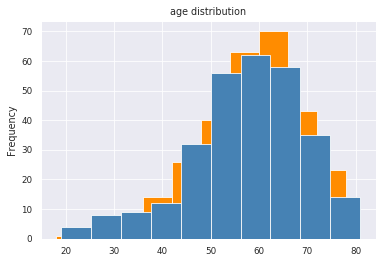

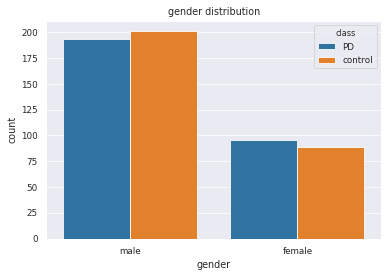

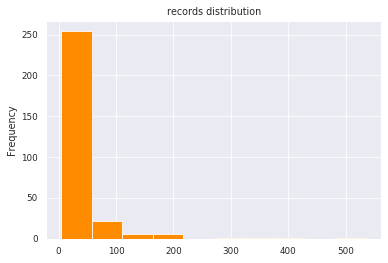

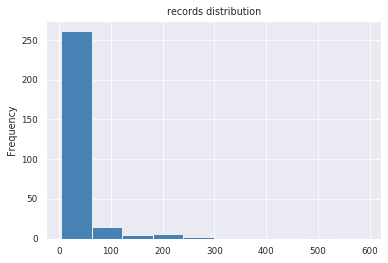

In [8]:
demographic[demographic["class"] == "PD"]["age"].plot(kind = "hist", color = "darkorange")
demographic[demographic["class"] == "control"]["age"].plot(kind = "hist", color = "steelblue")
plt.title("age distribution")
plt.show()

sns.countplot(x="gender", hue="class", data=demographic)
plt.title("gender distribution")
plt.show()

demographic[demographic["class"] == "PD"]["nrecords"].plot(kind = "hist", label = "PD", color = "darkorange")
plt.title("records distribution")
plt.show()
demographic[demographic["class"] == "control"]["nrecords"].plot(kind = "hist", label = "controls", color = "steelblue")
plt.title("records distribution")
plt.show()

### Figures

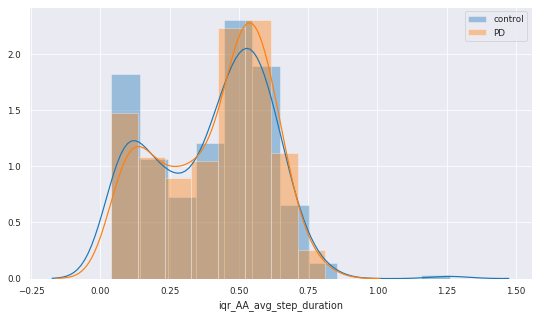

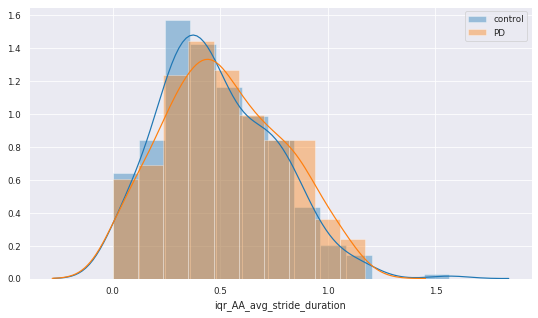

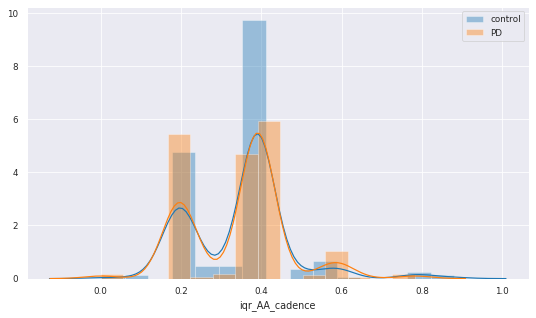

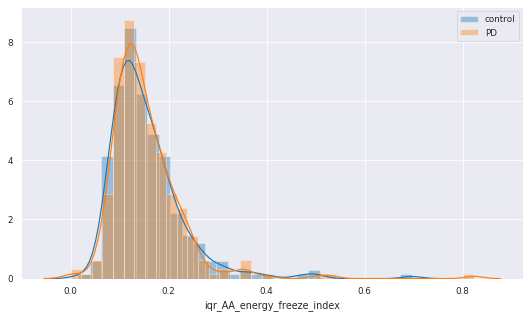

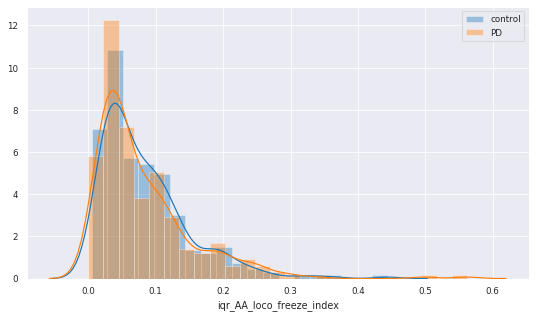

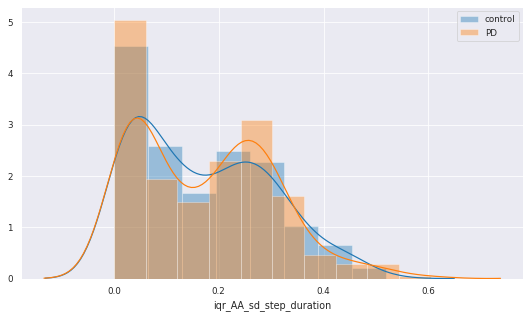

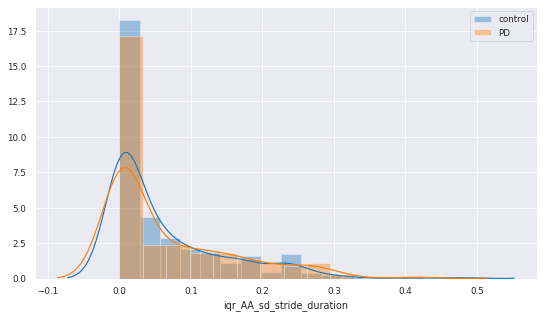

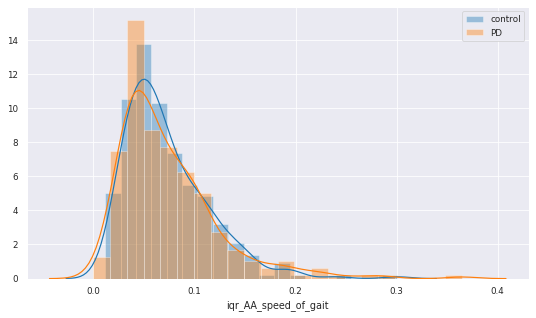

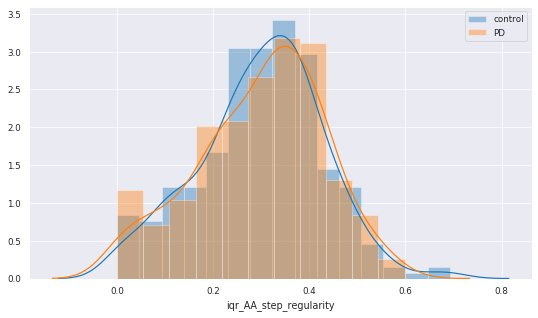

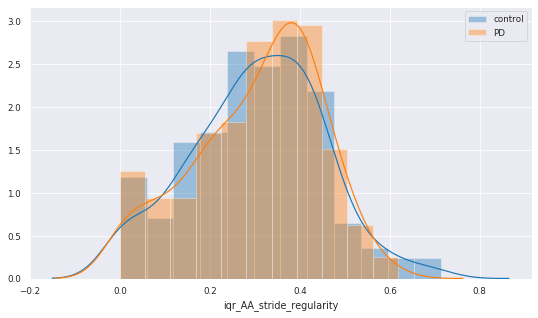

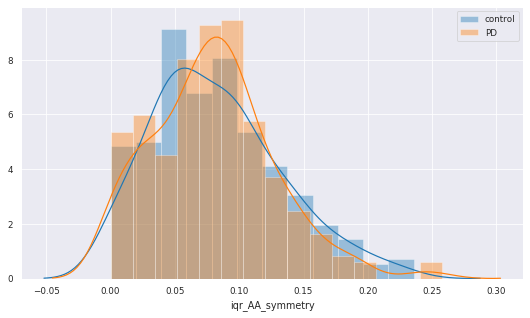

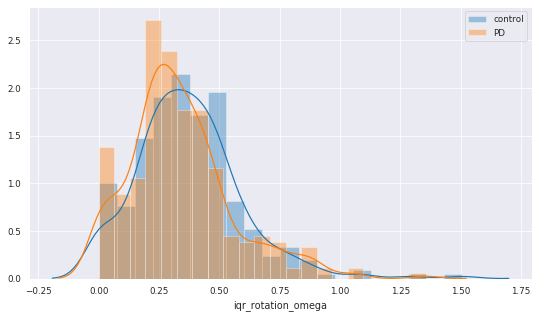

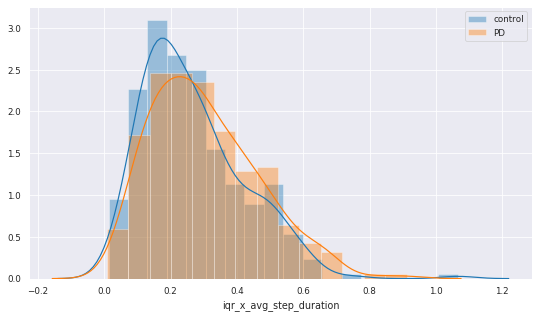

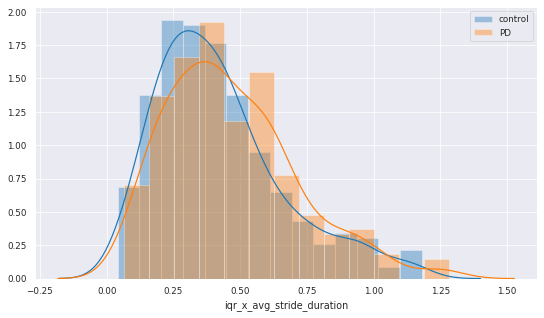

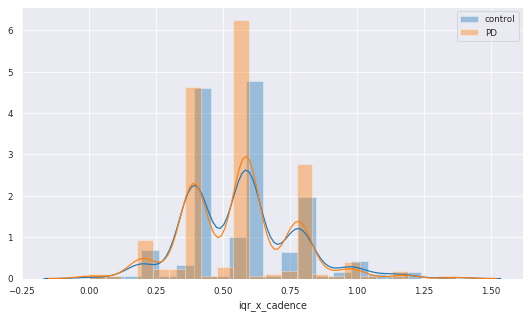

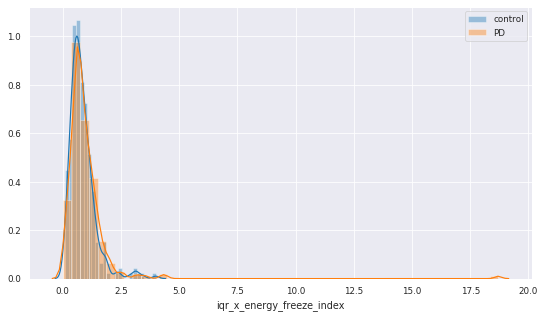

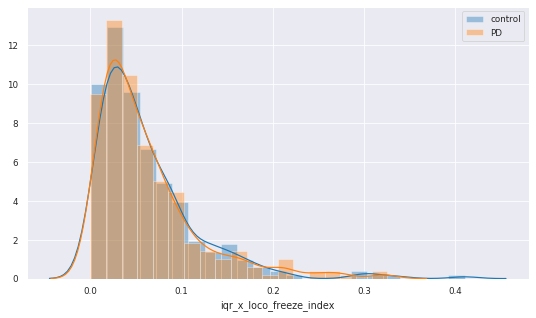

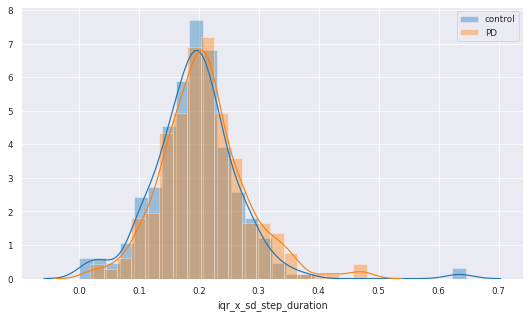

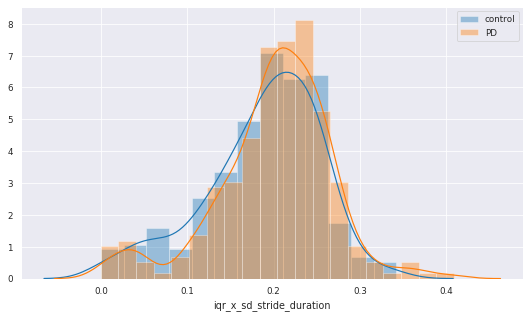

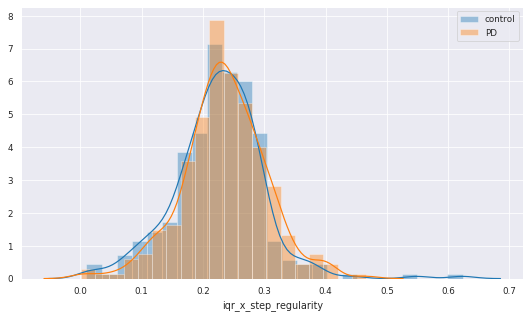

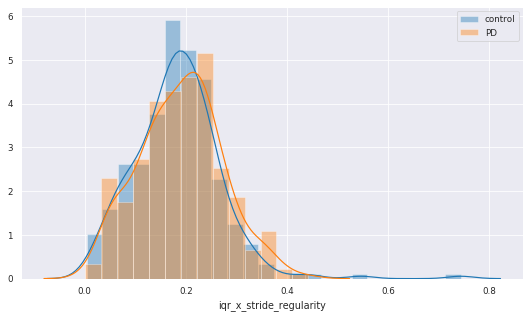

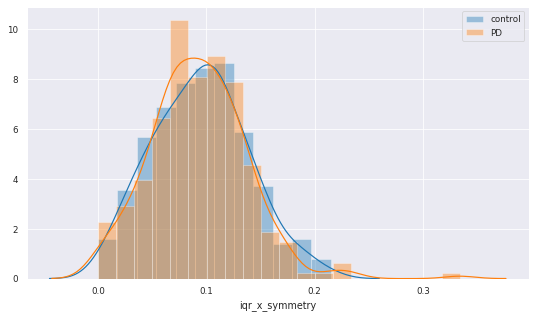

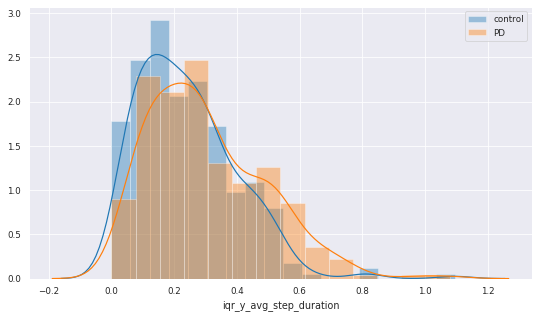

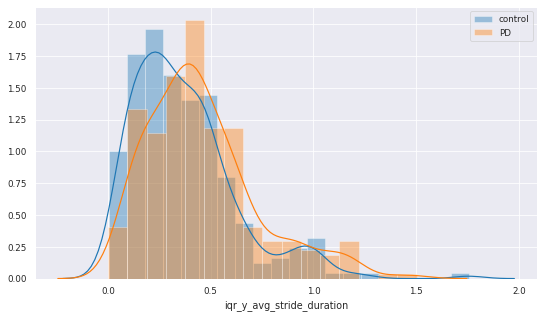

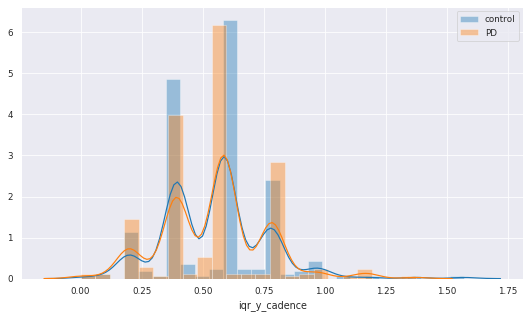

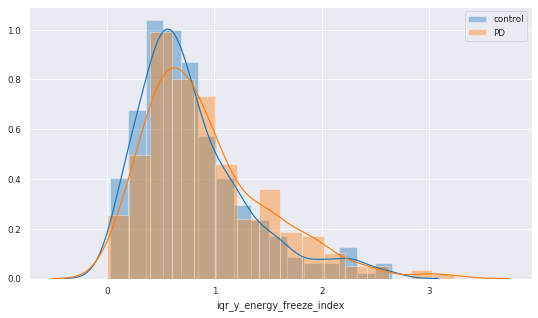

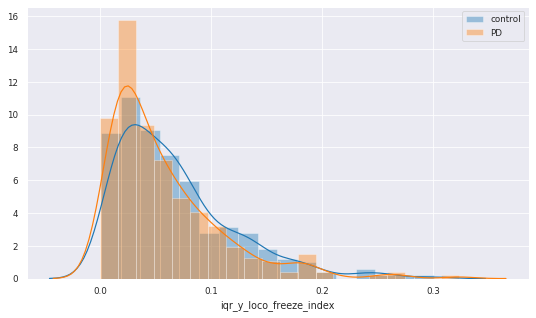

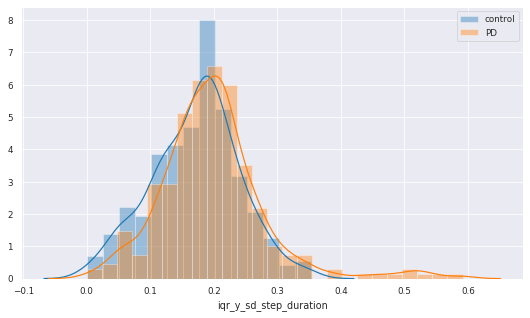

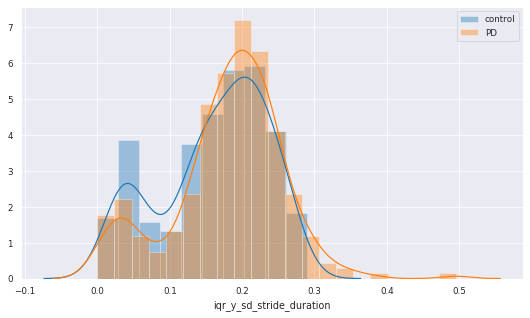

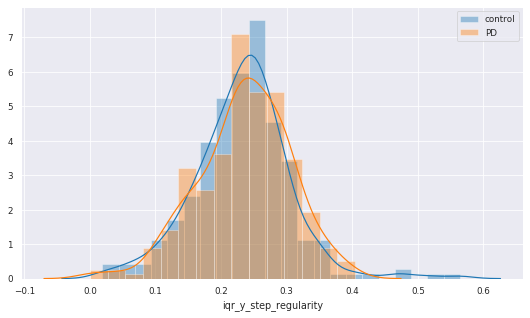

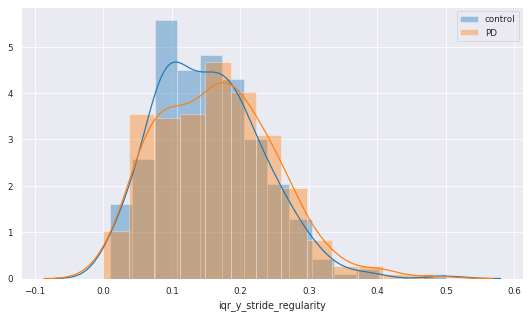

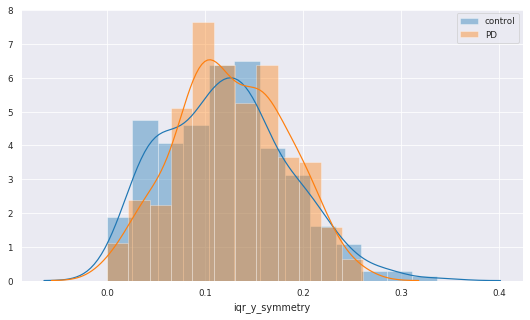

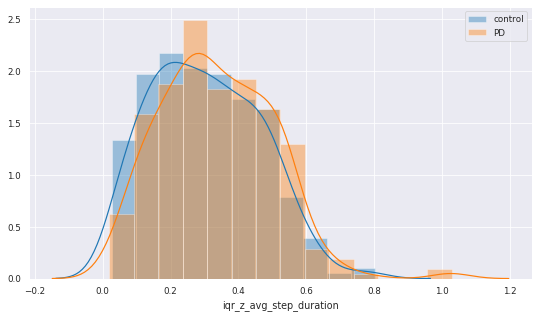

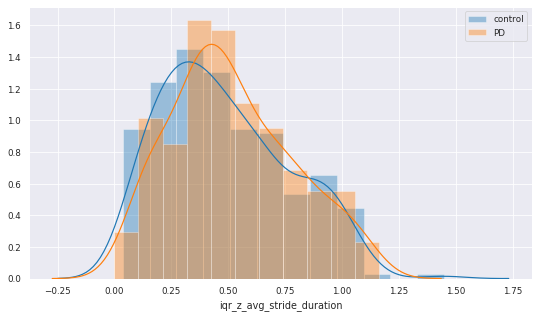

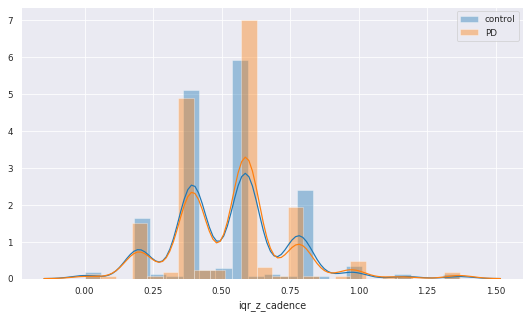

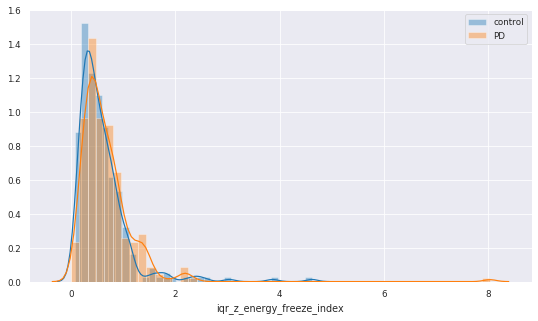

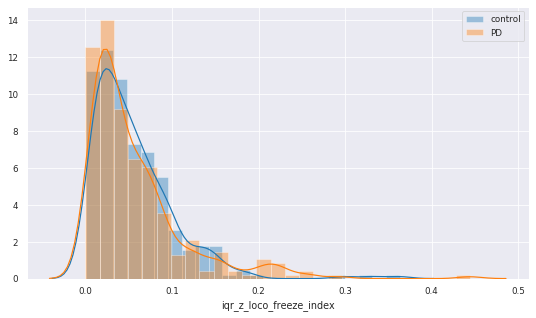

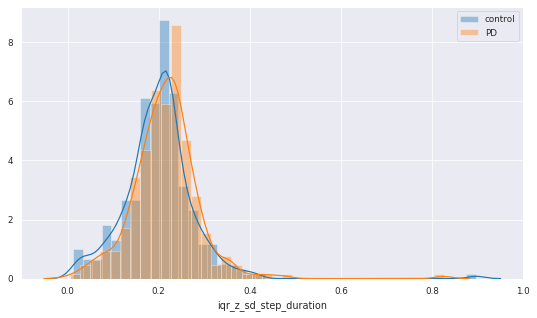

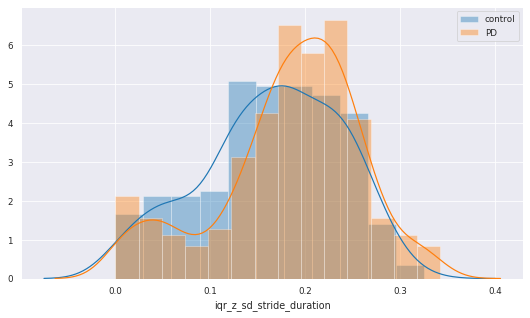

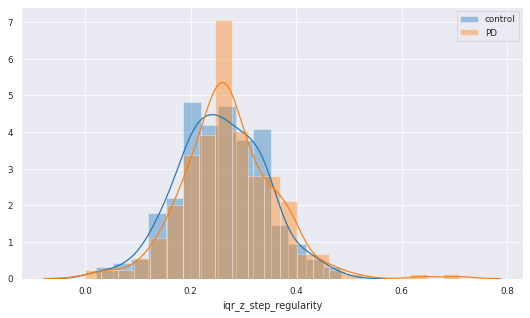

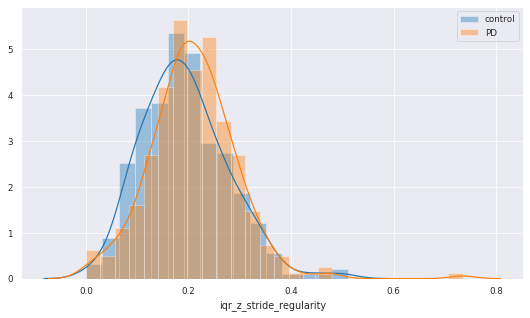

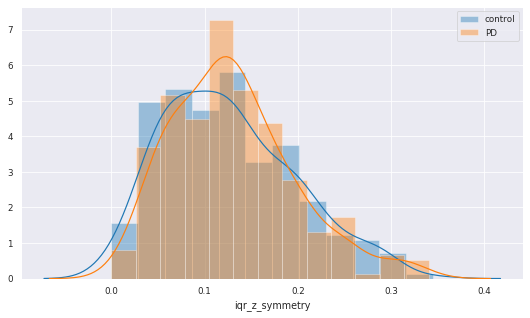

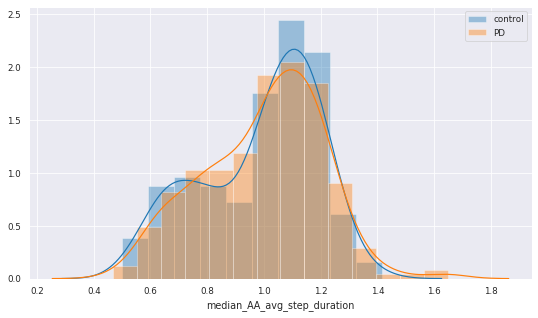

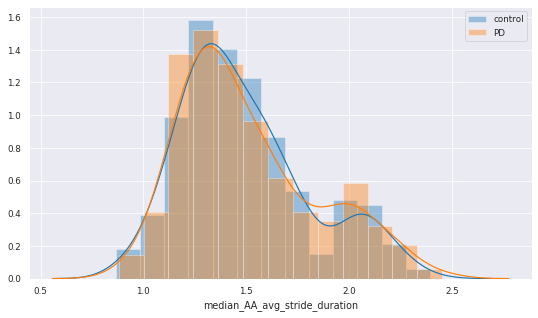

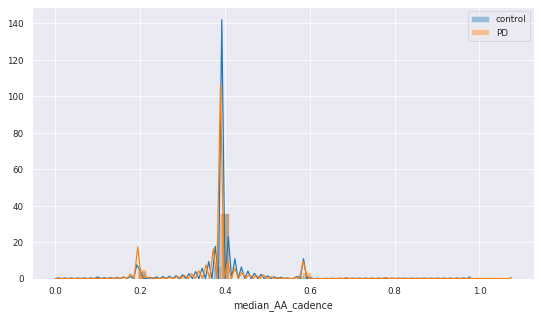

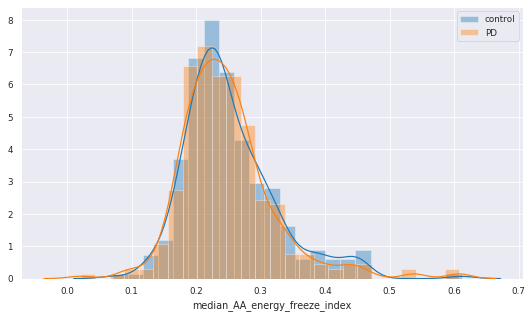

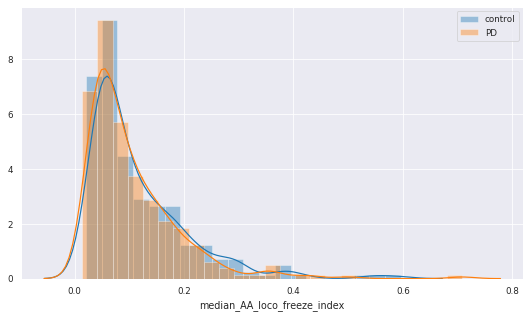

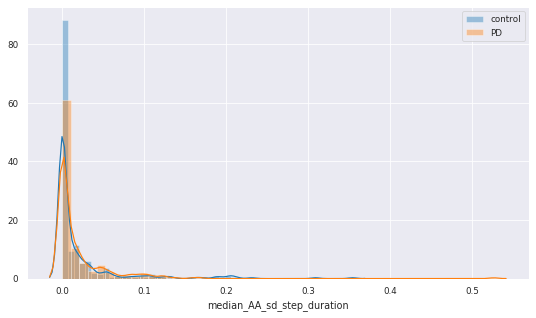

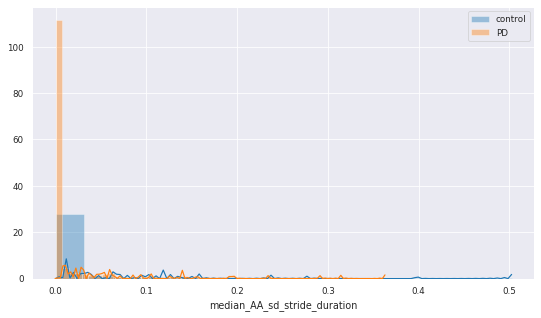

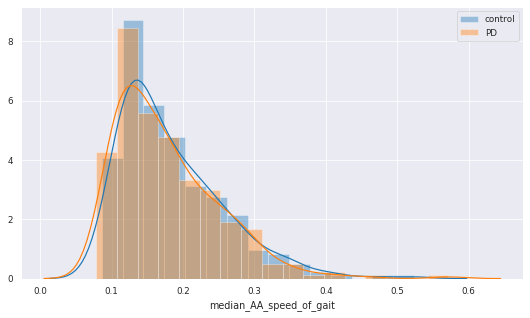

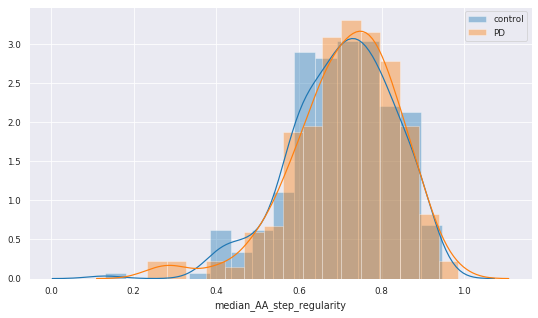

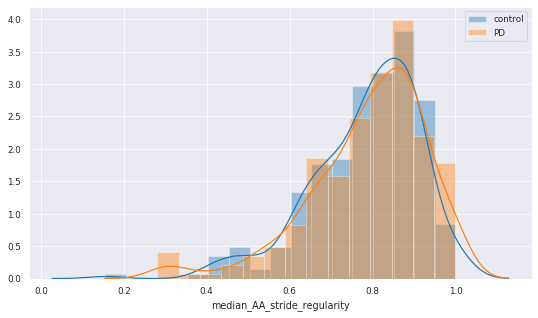

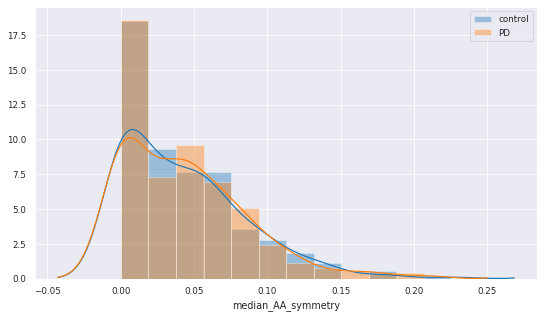

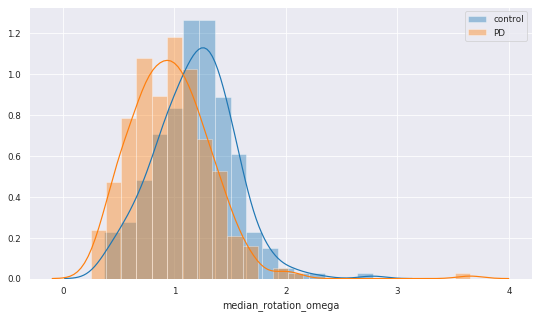

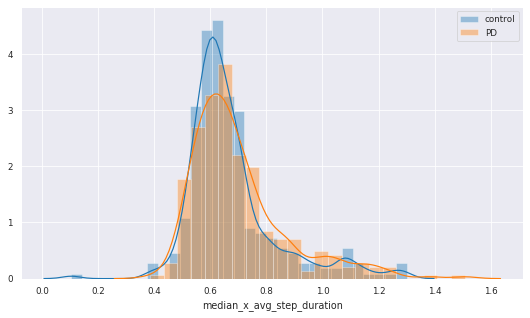

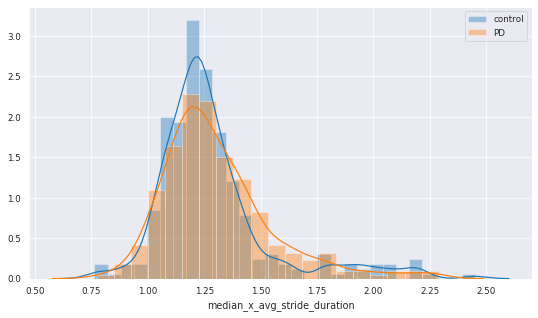

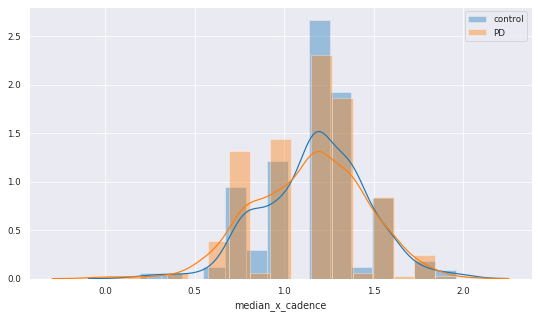

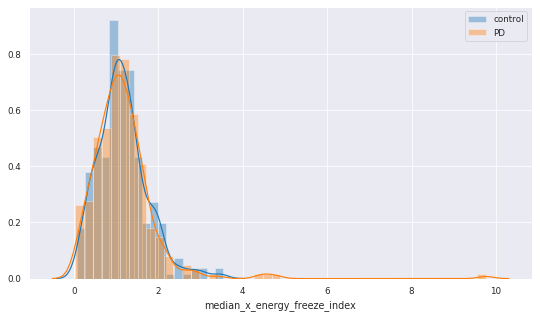

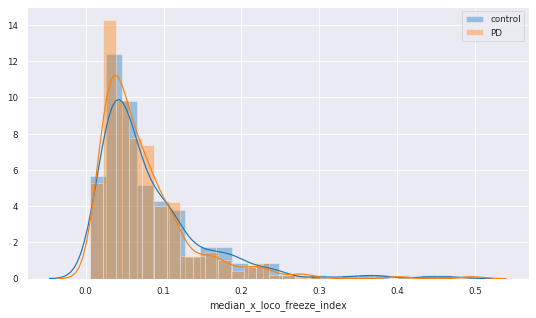

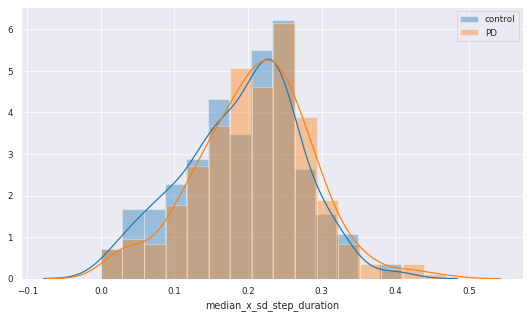

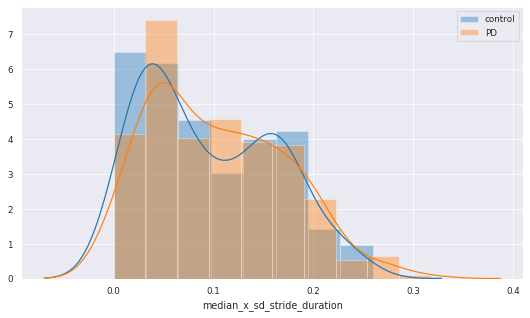

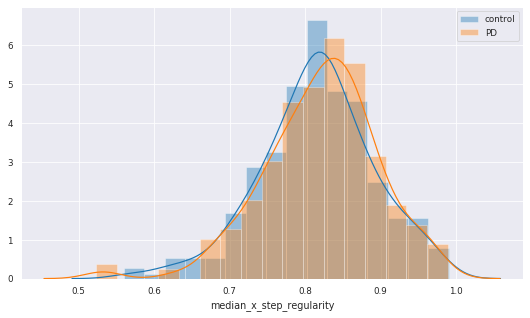

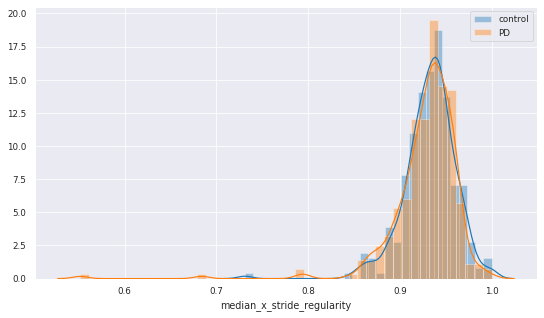

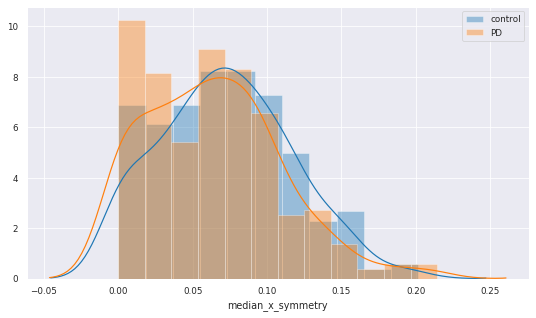

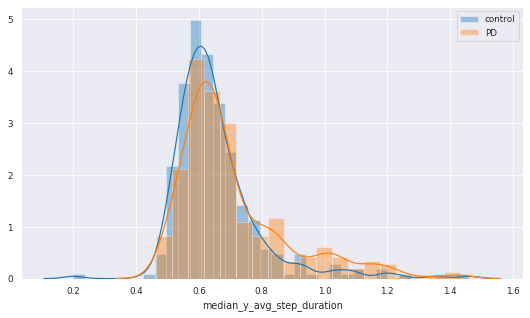

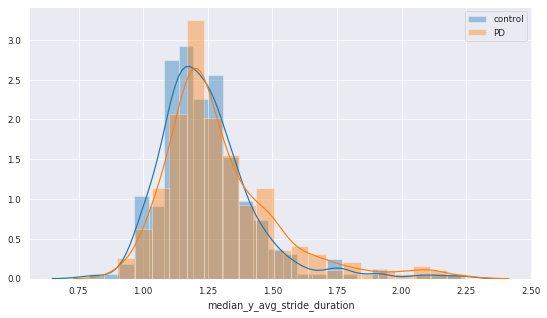

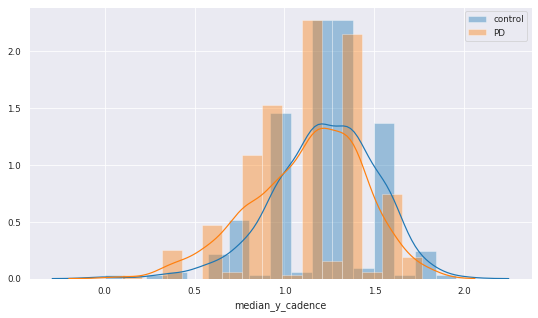

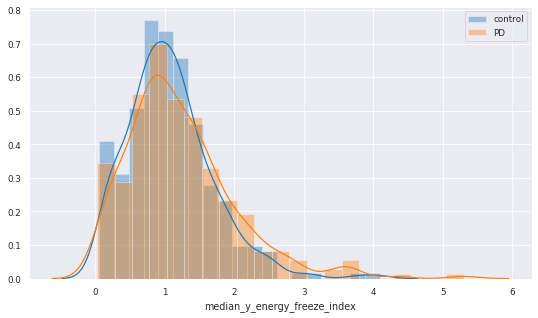

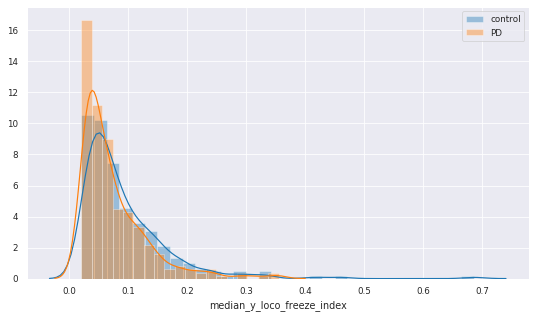

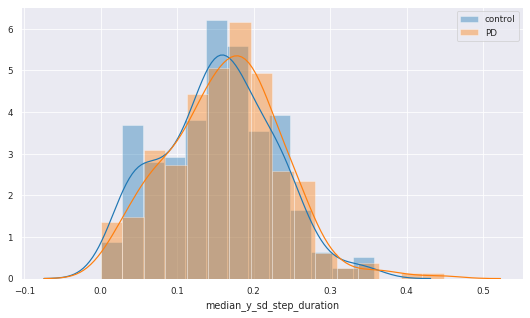

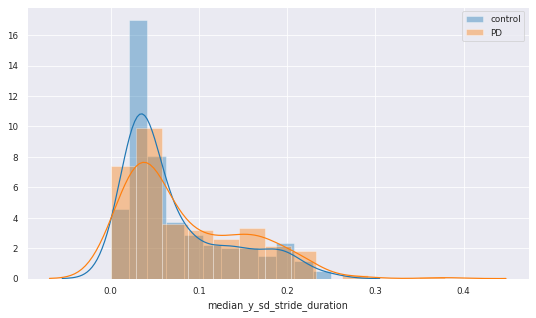

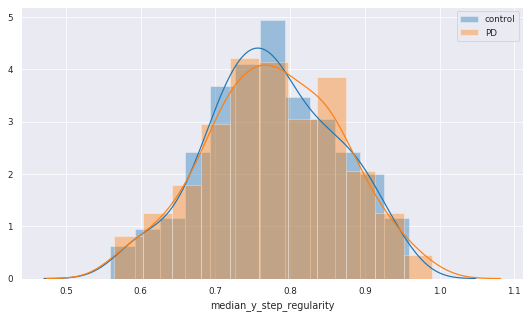

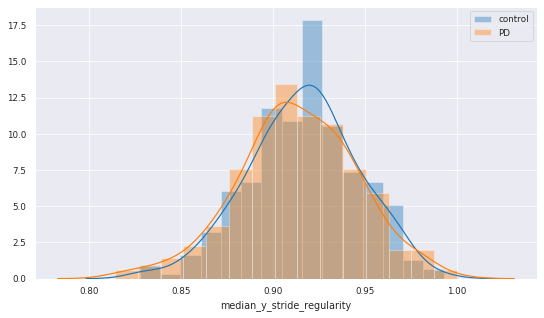

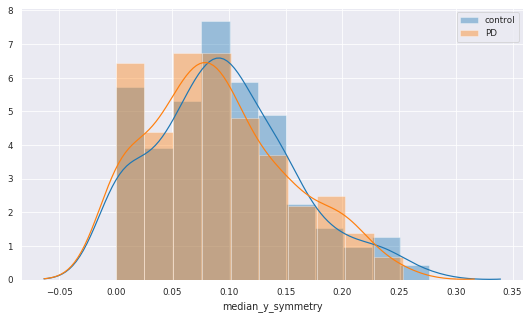

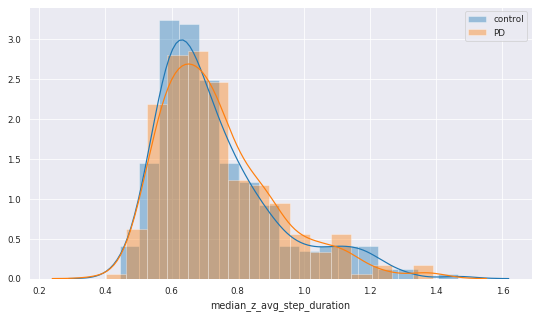

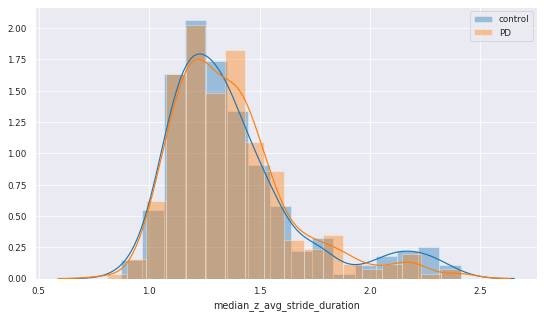

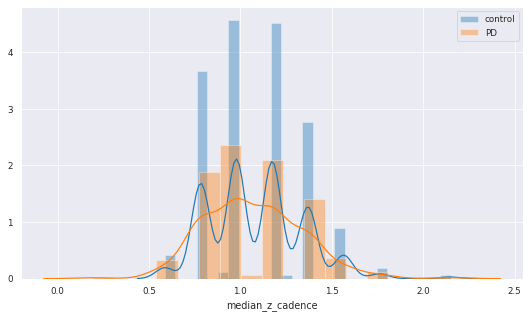

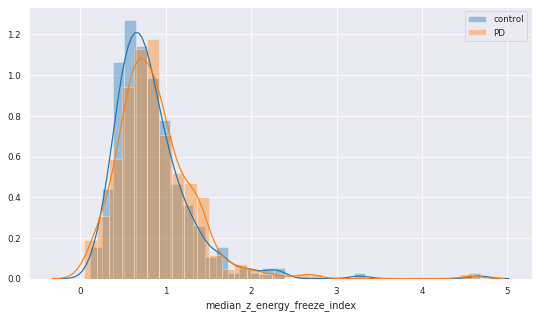

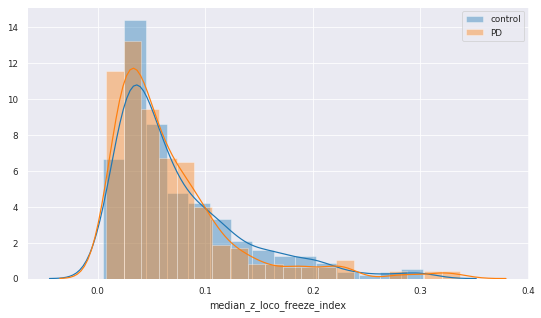

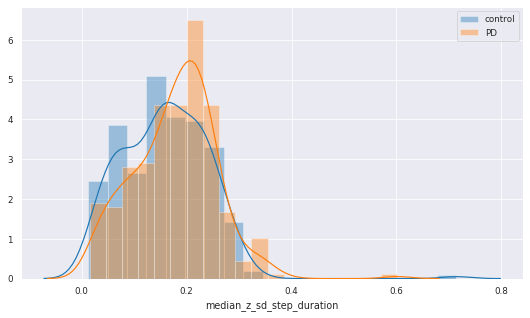

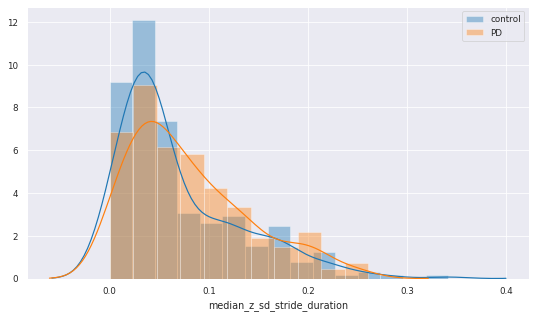

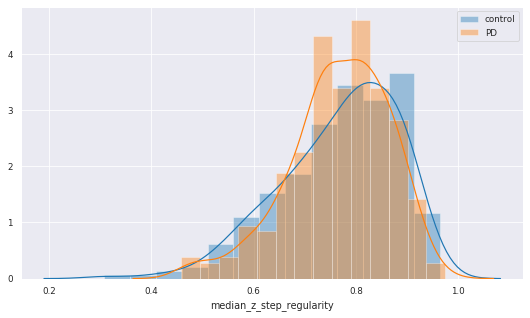

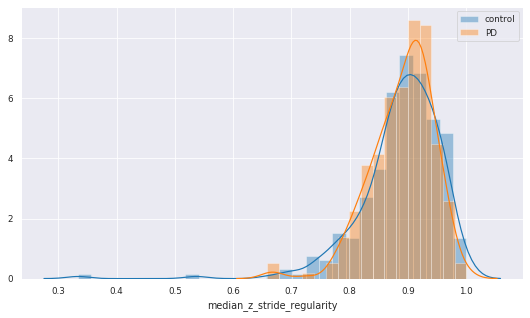

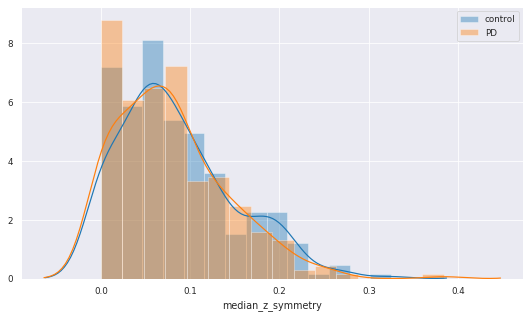

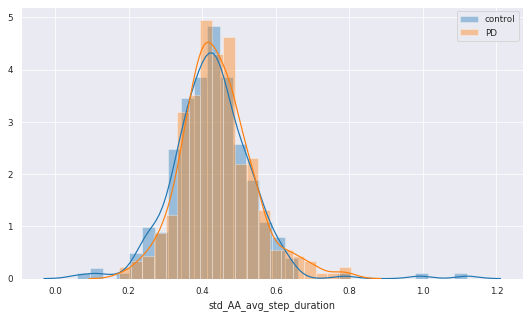

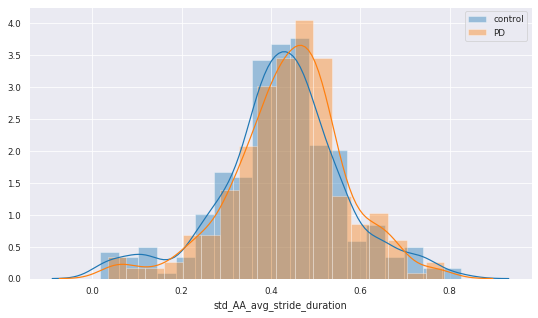

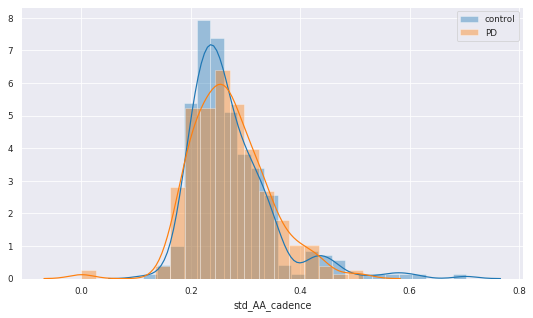

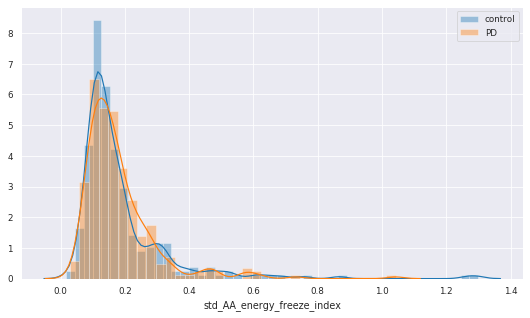

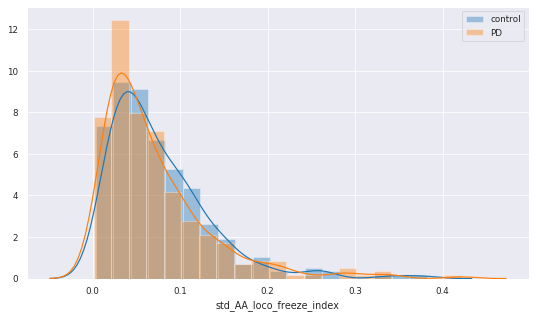

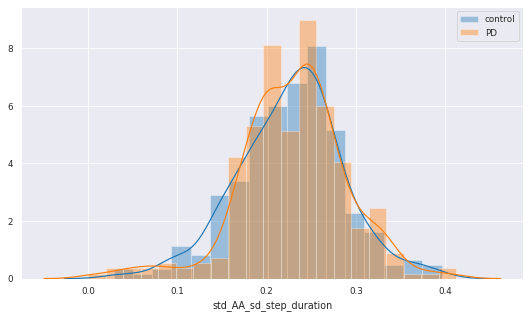

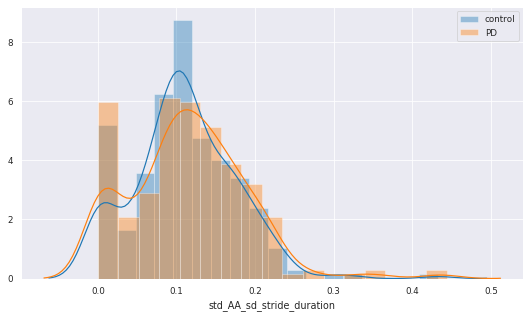

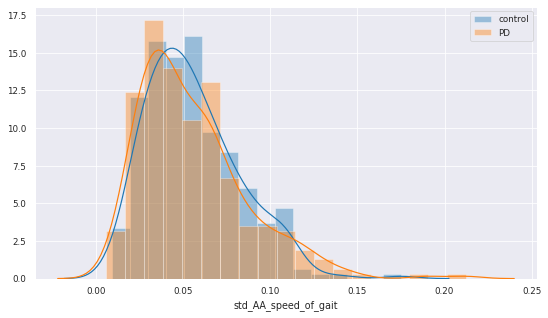

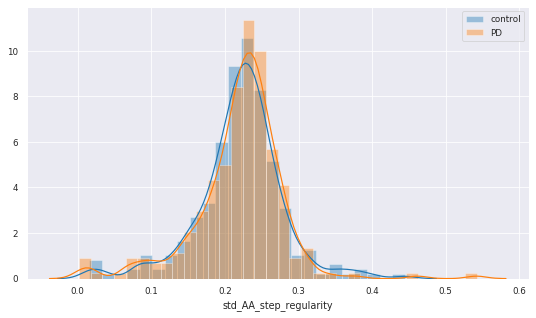

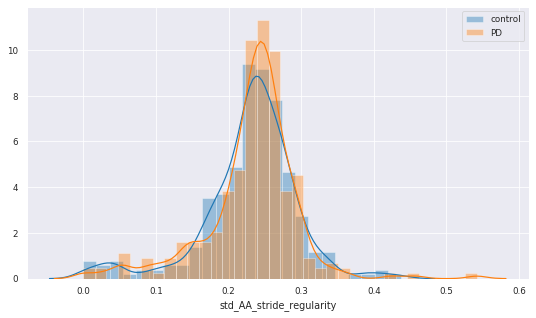

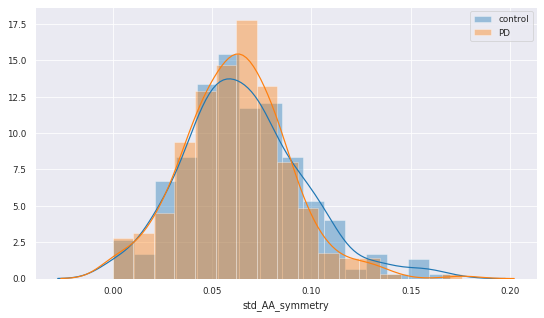

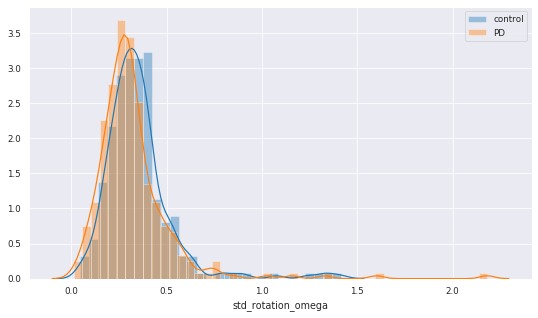

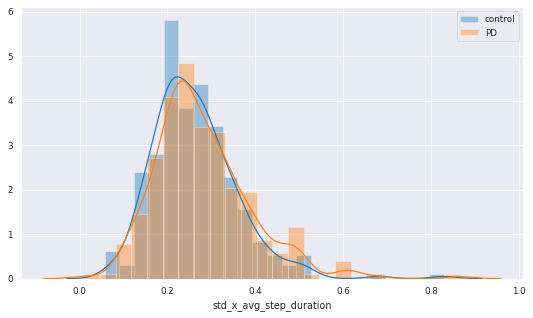

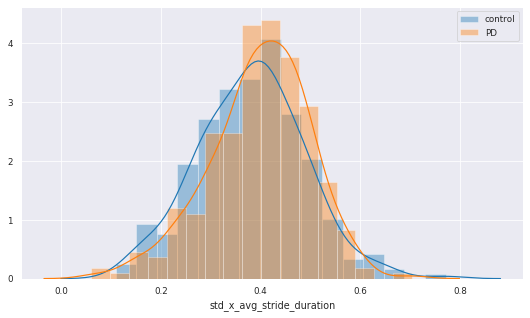

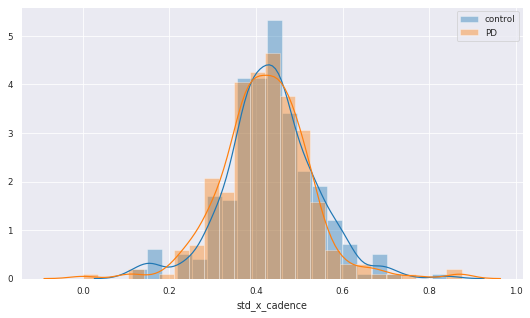

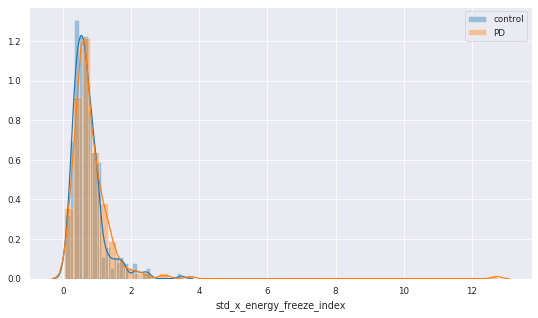

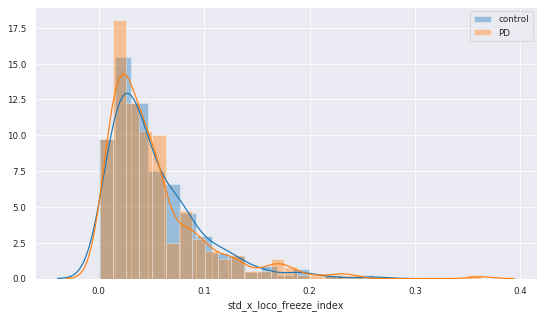

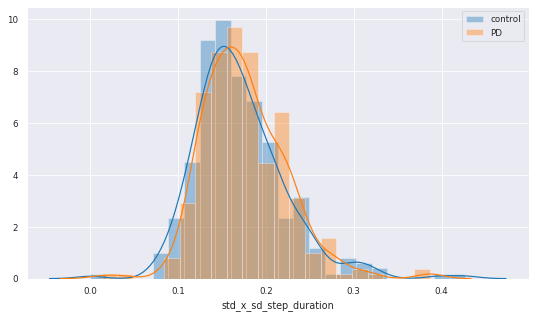

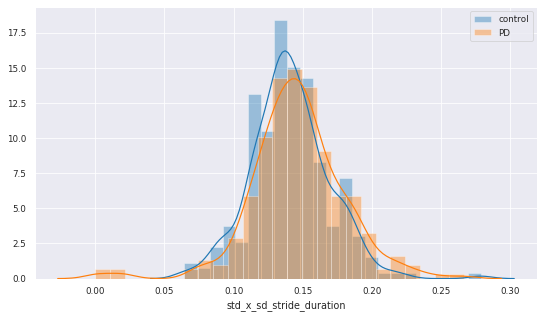

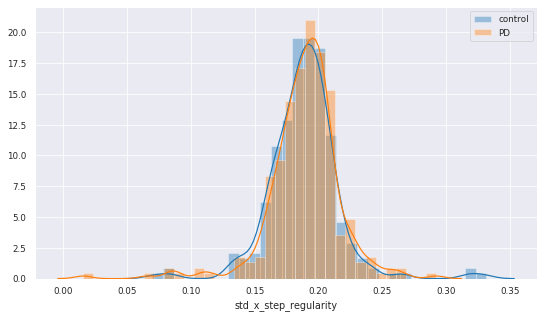

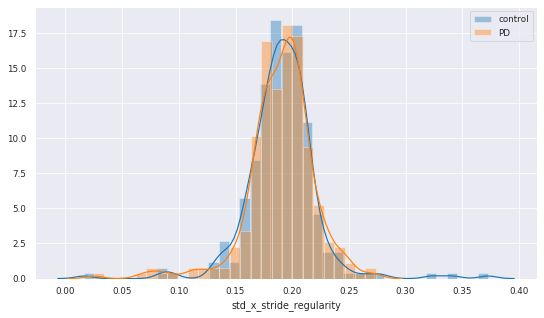

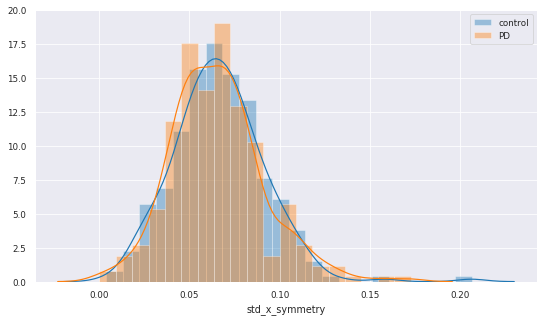

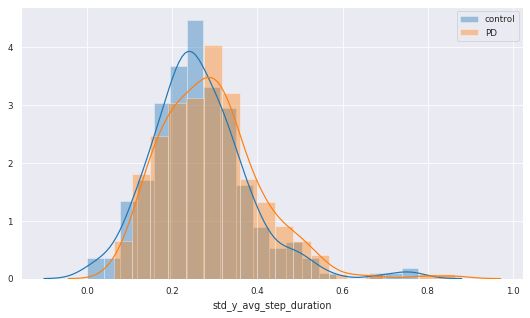

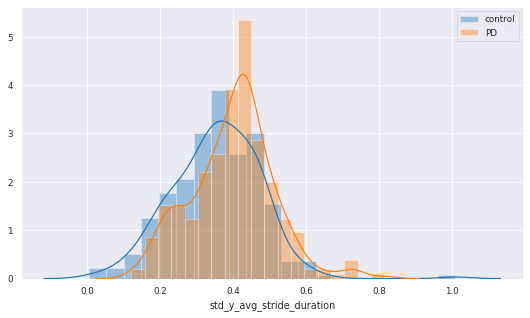

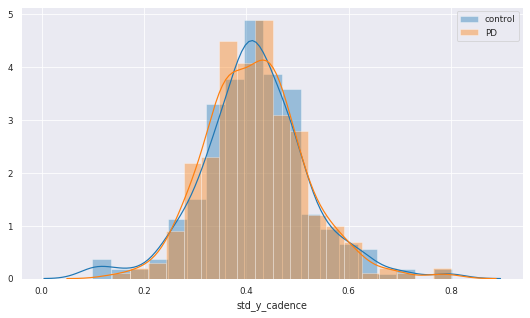

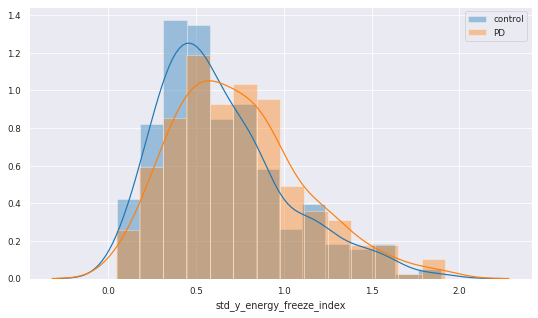

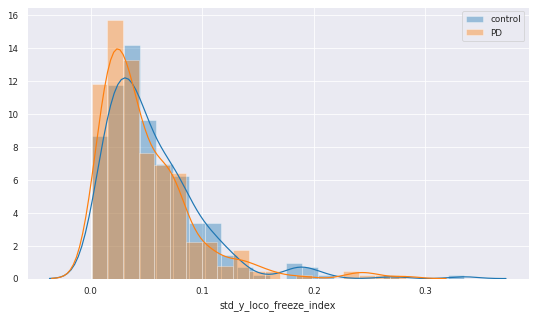

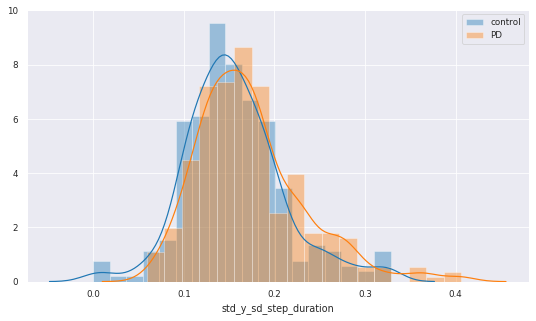

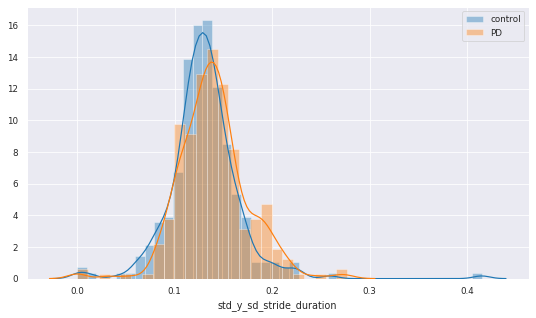

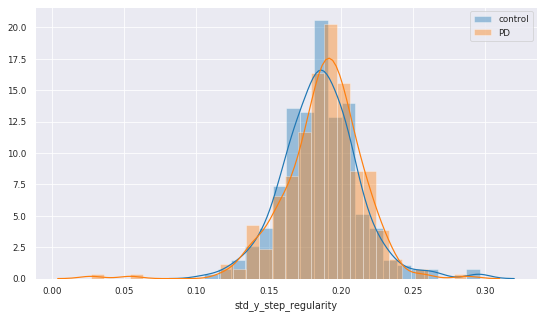

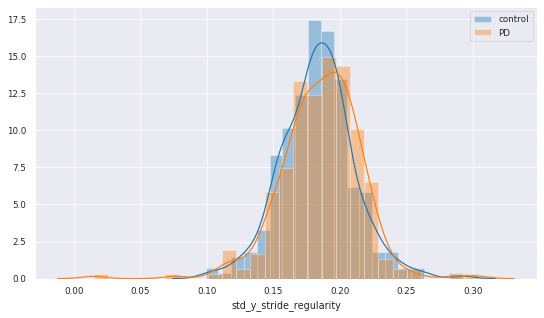

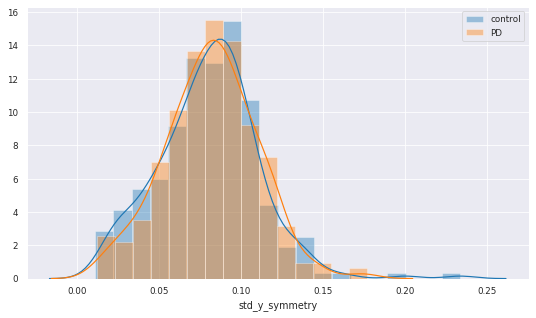

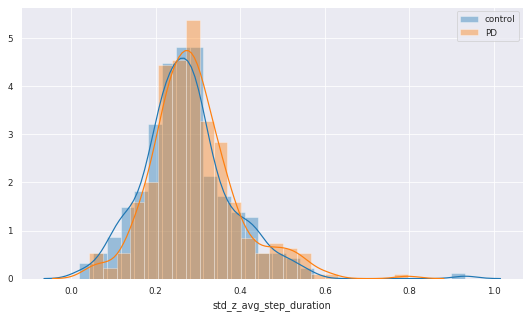

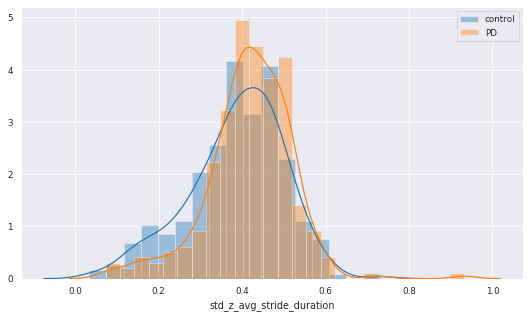

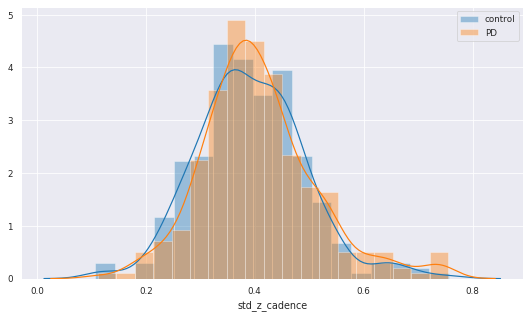

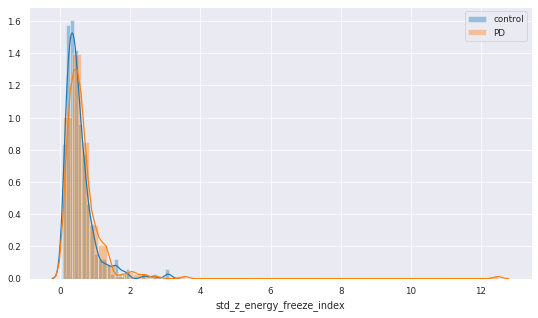

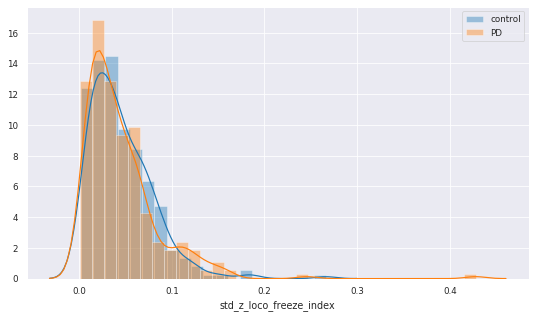

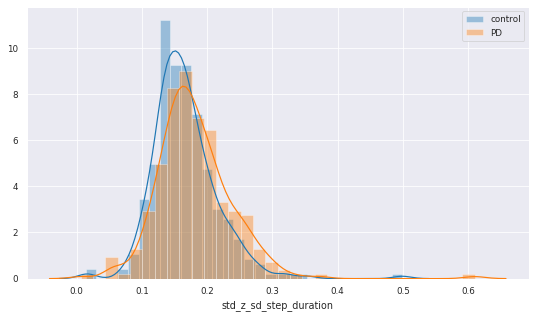

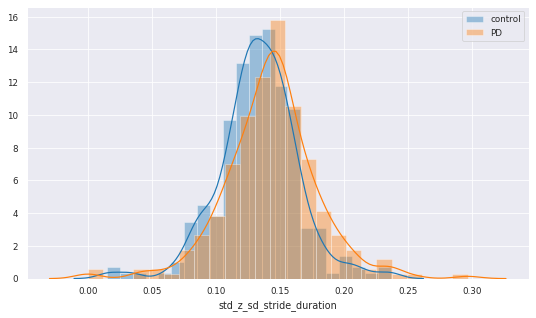

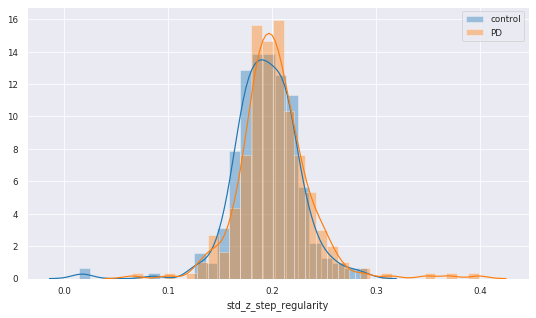

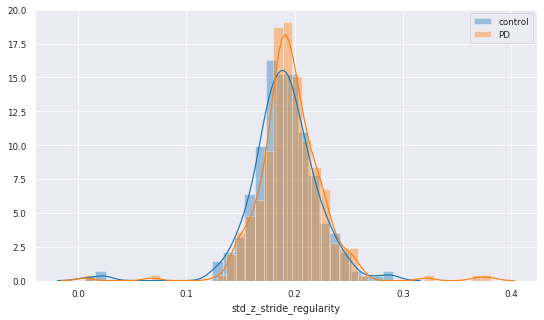

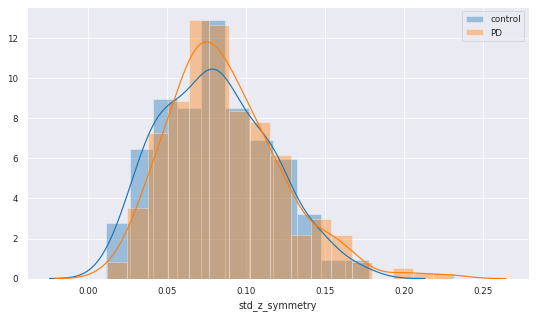

In [9]:
visualize_feature_in_classes(data, feat_cols)